In [2]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
#Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support


In [3]:
######################################################
############## DIALECT IDENTIFICATION ################
######################################################

In [6]:
#TEST THAT DIALECT IDENTIFICATION WORKS CORRECTLY
tfidf = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.8, ngram_range=[1,3])
dfs_x = dfs["Document"]
dfs_y = dfs["Label"]
x_train, x_test, y_train, y_test = train_test_split(dfs_x, dfs_y, test_size=0.2, random_state=4)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
dialect_clf = MultinomialNB()
#dialect_clf = SVC(kernel="sigmoid")
#dialect_clf = LinearSVC()
#dialect_clf = RandomForestClassifier()
dialect_clf.fit(x_train, y_train)
y_pred = dialect_clf.predict(x_test)

In [5]:
dfs = []
datasets = []
labels = ["HongKong", "Philippines", "Singapore", "Canada", "India"]
for dialect in range(len(labels)):
    comb=None
    for i in range(300):
        with open("..\CleanCorpora\{0}\_{0}CorporaCombined{1}.txt".format(labels[dialect], i), "r", encoding='UTF-8') as file:
            text = file.read()
        df = pd.DataFrame({"Label": labels[dialect], "Document": [text]})
        dfs.append(df)
    print(len(dfs))
    comb = pd.concat(dfs, ignore_index=True)
    datasets.append(comb)
#Concatenate all 4 dialects
dfs = pd.concat(datasets, ignore_index=True)
dialect_dfs = dfs

300
600
900
1200
1500


In [ ]:
print(y_p)

In [ ]:
#Accuracy, Feature importance, and Confusion Matrix
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))
print("==========")

In [ ]:
######################################################
################ SENTIMENT ANALYSIS ##################
######################################################

In [ ]:
#Malay -> Indian -> Reference
sentiment_comb = []

In [7]:
#Read the Malay file
sentiment_comb = []
filepath = "../Corpora/Sentiment-Malay/data_cleaned/TripAdvisor_data_cleaned.csv"
df = pd.read_csv(filepath, sep=",", engine="python", encoding="ISO-8859-1", nrows=6000)
df=df.drop(["Author", "Restaurant", "Location"], axis=1)
df=df[df["Rating"]!=3.0]
print(type(df))
df.loc[df["Rating"] == 4.0, "Rating"] = "positive"
df.loc[df["Rating"] == 5.0, "Rating"] = "positive"
df.loc[df["Rating"] == 2.0, "Rating"] = "negative"
df.loc[df["Rating"] == 1.0, "Rating"] = "negative"
not_positive_rows = df[df['Rating'] != 'positive']
positive_rows = df[df['Rating'] == 'positive']
positive_sample = positive_rows.sample(frac=0.1, random_state=42)
df = pd.concat([not_positive_rows, positive_sample])
df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
sentiment_malay_df = df
export_malay_df = df
print(len(df))
sentiment_comb.append(df)

<class 'pandas.core.frame.DataFrame'>
698


In [8]:
#Read the Indian file
sentiment_comb = []
filepath = "../Corpora/Sentiment-Indian/amazon_vfl_reviews.csv"
df = pd.read_csv(filepath, sep=",", engine="python", encoding="ISO-8859-1", nrows=1000)
df=df.drop(["asin", "name", "date"], axis=1)
df=df.rename(columns={"rating":"Rating"})
df=df.rename(columns={"review":"Review"})
df=df[df["Rating"]!=3.0]
df.loc[df["Rating"] == 4.0, "Rating"] = "positive"
df.loc[df["Rating"] == 5.0, "Rating"] = "positive"
df.loc[df["Rating"] == 2.0, "Rating"] = "negative"
df.loc[df["Rating"] == 1.0, "Rating"] = "negative"
df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
sentiment_indian_df = df
export_indian_df = df
print("Size: ",df.size, "\nHead:\n", df.head())
sentiment_comb.append(df)

Size:  1862 
Head:
      Rating                                             Review
0  negative  I bought this hair oil after viewing so many g...
1  positive  Used This Mama Earth Newly Launched Onion Oil ...
2  negative  So bad productMy hair falling increase too muc...
3  negative  Product just smells similar to navarathna hair...
4  positive  I have been trying different onion oil for my ...


In [9]:
#Read the Reference file
sentiment_comb = []
filepath = "../Corpora/Sentiment-Reference/test.txt.txt"
df = pd.DataFrame()
df["X"] = pd.read_csv(filepath, sep="\t", engine="python", encoding="ISO-8859-1", nrows=2000)
df[["Rating", "Review"]] = df["X"].str.split(" ", n=1, expand=True)
df.drop("X", axis=1, inplace=True)
df.loc[df["Rating"] == "__label__1", "Rating"] = "negative"
df.loc[df["Rating"] == "__label__2", "Rating"] = "positive"
df.head()
sentiment_ref_df = df
export_ref_df = df
sentiment_comb.append(df)

In [ ]:
y_test_comb = []
x_test_comb = []

In [10]:
#Train the model
#Singapores
df = sentiment_malay_df
tfidf = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.8, ngram_range=[1,3])
dfs_x = df["Review"]
dfs_y = df["Rating"]
x_train, x_test, y_train, y_test = train_test_split(dfs_x, dfs_y, test_size=0.2, random_state=3)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
malay_clf = MultinomialNB()
#malay_clf = SVC(kernel="sigmoid")
#malay_clf = LinearSVC()
#malay_clf = RandomForestClassifier()
malay_clf.fit(x_train, y_train)
y_pred = malay_clf.predict(x_test)

Accuracy: 91.43%
Precision:  0.9225806451612902
Recall:  0.9142857142857143
fscore:  0.9047765793528504
Confusion Matrix: 



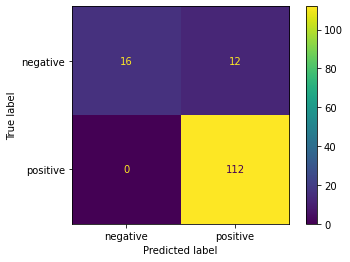

In [11]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, zero_division=0, average="weighted")
print("Precision: ", precision)
print("Recall: ", recall)
print("fscore: ", fscore)
print("==========")
print("Confusion Matrix: \n")
conf_matrix = confusion_matrix(y_test, y_pred, labels=malay_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=malay_clf.classes_)
disp.plot()
plt.show()


In [12]:
#Train the model
#Indian
df = sentiment_indian_df
tfidf = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.8, ngram_range=[1,3])
dfs_x = df["Review"]
dfs_y = df["Rating"]
x_train, x_test, y_train, y_test = train_test_split(dfs_x, dfs_y, test_size=0.2, random_state=0)
x_train = tfidf.fit_transform(x_train)
indian_x_test = tfidf.transform(x_test)
indian_clf = MultinomialNB()
#malay_clf = SVC(kernel="sigmoid")
#malay_clf = LinearSVC()
#malay_clf = RandomForestClassifier()
indian_clf.fit(x_train, y_train)
y_pred = indian_clf.predict(indian_x_test)

Accuracy: 87.70%
Precision:  0.8943604212460221
Recall:  0.8770053475935828
fscore:  0.8617517924120499
Feature Importance:

Label: Negative
use: 0.3081901560503926
leather straps: 0.29220116827954934
wrist: 0.2844639796634029
straps: 0.27776172202775445
cheap: 0.27184991181921714

Label: Positive
ubtan: 0.39993230309689026
facewash: 0.33736734800475326
skin: 0.21923215243586786
glow skin: 0.2149360384478544
helps removing: 0.2149360384478544
Confusion Matrix: 



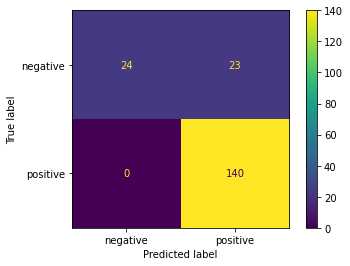

In [13]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, zero_division=0, average="weighted")
print("Precision: ", precision)
print("Recall: ", recall)
print("fscore: ", fscore)
print("==========")
print("Feature Importance:")
labels = ["Negative", "Positive"]
tfidf_values = x_train.toarray()
feature_names = tfidf.get_feature_names_out()
word_tfidf = {}
for i, label in enumerate(labels):
    for word, tfidf_val in zip(feature_names, tfidf_values[i]):
        if label in word_tfidf:
            word_tfidf[label][word] = tfidf_val
        else:
            word_tfidf[label] = {word: tfidf_val}

sorted_words = {label:sorted(word_tfidf[label].items(), key=lambda x: x[1], reverse=True) for label in labels}

n = 5
for label in labels:
    print(f"\nLabel: {label}")
    for word, tfidf_val in sorted_words[label][:n]:
        print(f"{word}: {tfidf_val}")
print("==========")
print("Confusion Matrix: \n")
conf_matrix = confusion_matrix(y_test, y_pred, labels=indian_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=indian_clf.classes_)
disp.plot()
plt.show()


In [14]:
#Combine all the models
import_indian_df = export_indian_df
import_indian_df["Rating"] = "India"
import_malay_df = export_malay_df
import_malay_df["Rating"] = "Singapore"
sa_combined_df = pd.concat([import_indian_df, import_malay_df])
print(len(import_indian_df), len(import_malay_df))

931 698


Reference model tested on Reference dataset
Accuracy: 78.25%
Precision:  0.7910894047345438
Recall:  0.7825
fscore:  0.7813741176470589
Feature Importance:
0.001969248565576085

Label: Negative
worth buying: 0.39936607816385283
episodes: 0.37917544706827205
buying: 0.2844574829716025
worth: 0.24805911715451454
bad: 0.22873565068477755

Label: Positive
router: 0.6458664833570184
internet: 0.3030538380716051
range: 0.2850247914922847
bad: 0.17688058685936697
hopefully: 0.1576877215957872
Confusion Matrix: 



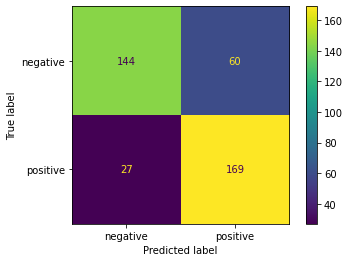

In [15]:
#Train the model
#Reference
df = sentiment_ref_df
tfidf = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.8, ngram_range=[1,3])
dfs_x = df["Review"]
dfs_y = df["Rating"]
x_train, x_test, y_train, y_test = train_test_split(dfs_x, dfs_y, test_size=0.2, random_state=4)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
ref_clf=MultinomialNB()
#ref_clf = SVC(kernel="sigmoid")
#malay_clf = SVC(kernel="sigmoid")
#malay_clf = LinearSVC()
#malay_clf = RandomForestClassifier()
ref_clf.fit(x_train, y_train)
y_pred = ref_clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Reference model tested on Reference dataset")
print("Accuracy: {:.2f}%".format(acc * 100))
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, zero_division=0, average="weighted")
print("Precision: ", precision)
print("Recall: ", recall)
print("fscore: ", fscore)
print("==========")
print("Feature Importance:")
labels = ["Negative", "Positive"]
tfidf_values = x_train.toarray()
print(np.mean(tfidf_values))
feature_names = tfidf.get_feature_names_out()
word_tfidf = {}
for i, label in enumerate(labels):
    for word, tfidf_val in zip(feature_names, tfidf_values[i]):
        if label in word_tfidf:
            word_tfidf[label][word] = tfidf_val
        else:
            word_tfidf[label] = {word: tfidf_val}

sorted_words = {label:sorted(word_tfidf[label].items(), key=lambda x: x[1], reverse=True) for label in labels}

n = 5
for label in labels:
    print(f"\nLabel: {label}")
    for word, tfidf_val in sorted_words[label][:n]:
        print(f"{word}: {tfidf_val}")
print("==========")
print("Confusion Matrix: \n")
conf_matrix = confusion_matrix(y_test, y_pred, labels=ref_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ref_clf.classes_)
disp.plot()
plt.show()


In [16]:
import_indian_df = export_malay_df
import_indian_df = import_indian_df.sample(frac=0.2)
import_indian_df_x = import_indian_df["Review"]
import_indian_df_y = import_indian_df["Rating"]
#label dataframe needs to match the 
test_indian_dfs_x=tfidf.transform(import_indian_df_x)
y_pred2 = ref_clf.predict(test_indian_dfs_x)
acc2 = accuracy_score(import_indian_df_y, y_pred2)
print(import_indian_df_x)
print("Reference model tested on Indian dataset")
print("Accuracy: {:.2f}%".format(acc2 * 100))
precision, recall, fscore, support = precision_recall_fscore_support(import_indian_df_y, y_pred2, zero_division=0, average="weighted")
print("Precision: ", precision)
print("Recall: ", recall)
print("fscore: ", fscore)
print("==========")
print("Confusion Matrix: \n")
conf_matrix = confusion_matrix(import_indian_df_y, y_pred2, labels=ref_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ref_clf.classes_)
disp.plot()
plt.show()

2768    Canopy everything is going better  food drinks...
374     Good services from the Manager Adli and also t...
4293    Miss azuraAlam is good service for customers B...
3139    We have been eating and drinking at Canopy dur...
3161    Canopy is a lowest floor rooftop bar in Kuala ...
                              ...                        
934     Very excellent service by the staff Had aglio ...
564     Had an wonderful dining experience at Chambers...
1797    Excellent place to go for an English breakfast...
5501    Although this is an OK restaurant when the cro...
5090    Delicious food and best service especially sta...
Name: Review, Length: 140, dtype: object
Reference model tested on Indian dataset
Accuracy: 0.00%
Precision:  0.0
Recall:  0.0
fscore:  0.0
Confusion Matrix: 



ValueError: At least one label specified must be in y_true

In [ ]:
#TEST TO SEE IF dialect identifier can tell where each comes from
tfidf = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.8, ngram_range=[1,3])
dfs=dialect_dfs
dfs_x = dfs["Document"]
dfs_y = dfs["Label"]
x_train, x_test, y_train, y_test = train_test_split(dfs_x, dfs_y, test_size=0.2, random_state=0)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)
dialect_clf = MultinomialNB()
dialect_clf.fit(x_train, y_train)

In [ ]:
sa_combined_df_x = sa_combined_df["Review"]
sa_combined_df_y = sa_combined_df["Rating"]
x_test = tfidf.transform(sa_combined_df_x)
y_pred = dialect_clf.predict(x_test)
acc = accuracy_score(sa_combined_df_y, y_pred)
print("Dialect identificaton model tested SA datasets")
tfidf_values = x_train.toarray()
print(np.mean(tfidf_values))
print("Accuracy: {:.2f}%".format(acc * 100))
precision, recall, fscore, support = precision_recall_fscore_support(sa_combined_df_y, y_pred, zero_division=0, average="macro")
print("Precision: ", (precision))
print("Recall: ", (recall))
print("fscore: ", (fscore))
print("==========")
print("Confusion Matrix: \n")
conf_matrix = confusion_matrix(sa_combined_df_y, y_pred, labels=dialect_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dialect_clf.classes_)
disp.plot()
plt.show()